<a href="https://colab.research.google.com/github/Manish-2708/pyt_man/blob/main/Assignment_6_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

In [ ]:
bank=pd.read_csv("/content/bank-full.csv", delimiter=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


EDA

In [ ]:
bank.shape

(45211, 17)

In [ ]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
bank.skew()

<ipython-input-41-474b15bda74b>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  bank.skew()


age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

In [ ]:
bank.kurt()

<ipython-input-42-ead6b57d45c0>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  bank.kurt()


age            0.319570
balance      140.751547
day           -1.059897
duration      18.153915
campaign      39.249651
pdays          6.935195
previous    4506.860660
dtype: float64

In [ ]:
#missing value
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
bank.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

In [ ]:
bank[bank.duplicated()].shape

(0, 17)

In [ ]:
bank.corr()

<ipython-input-46-b90cc3cd727b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bank.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [ ]:
#lets find discrete and continous features
discrete_feature = [feature for feature in bank.columns if len(bank[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 10


In [ ]:
continuous_feature = [feature for feature in bank.columns if bank[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


<ipython-input-49-de65691e82e3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bank.corr(), annot=True)


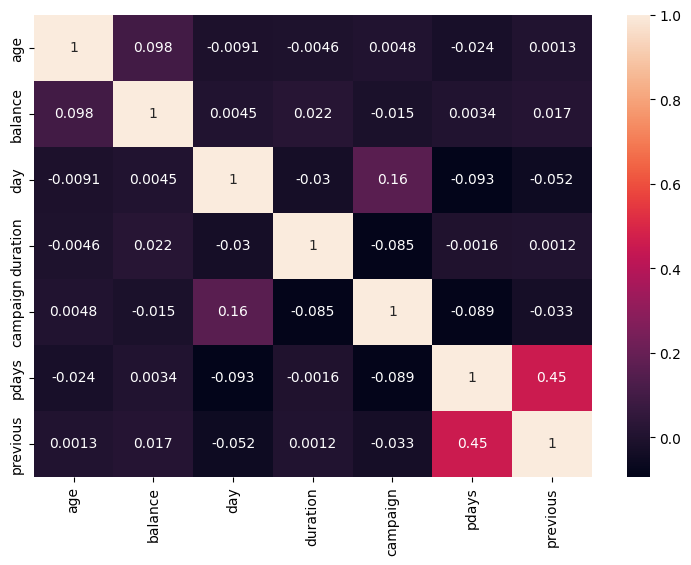

In [ ]:
fig = plt.figure(figsize= (9,6))
sns.heatmap(bank.corr(), annot=True)
plt.xticks(rotation=90)
plt.show()

Lets analyze the continuous values by creating histograms to understand the distribution of the numerical features

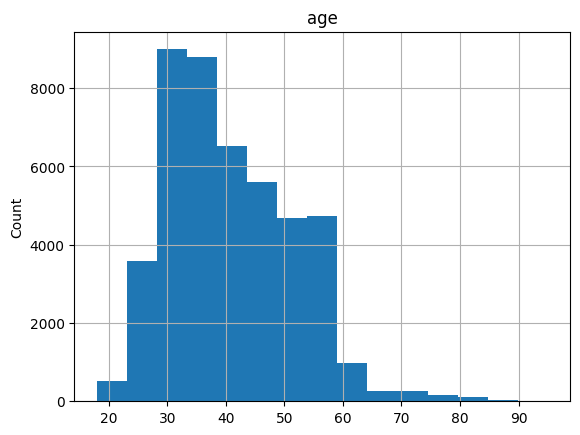

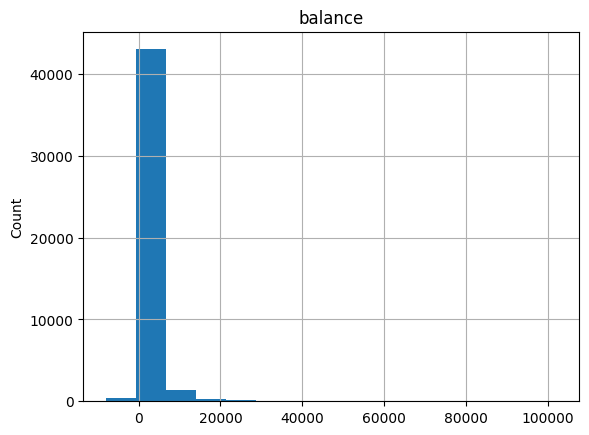

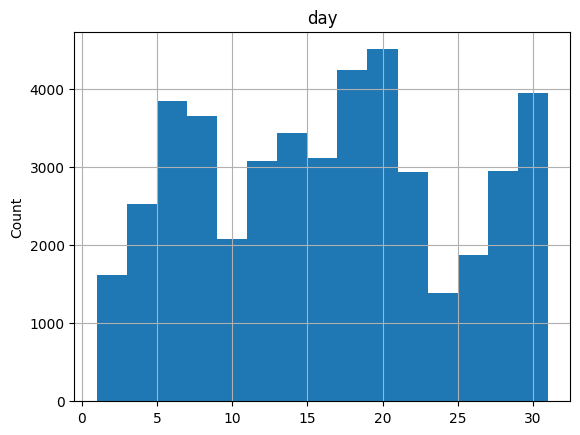

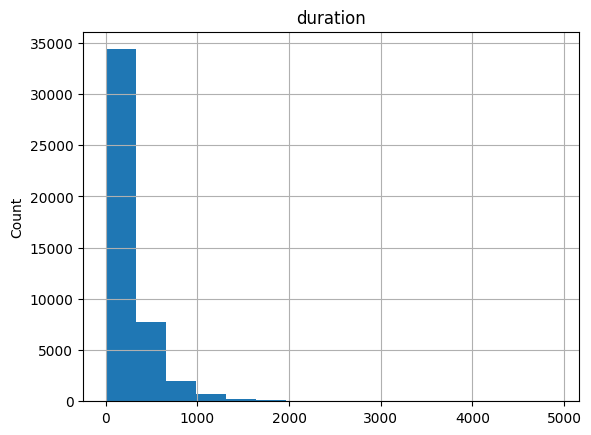

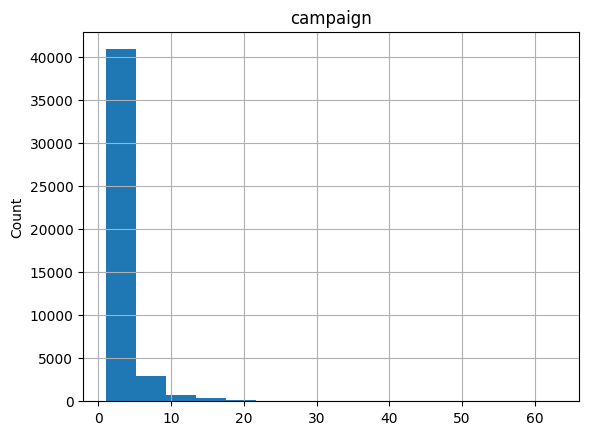

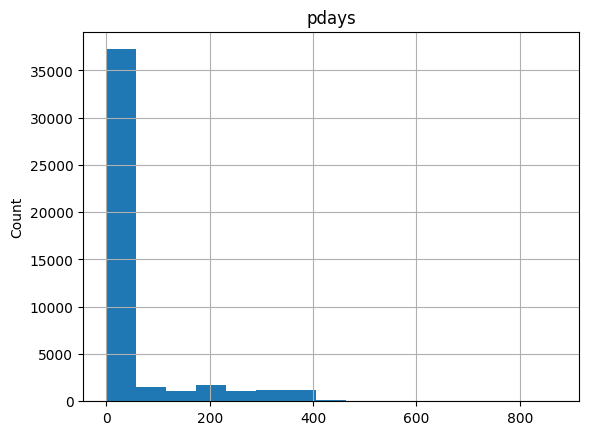

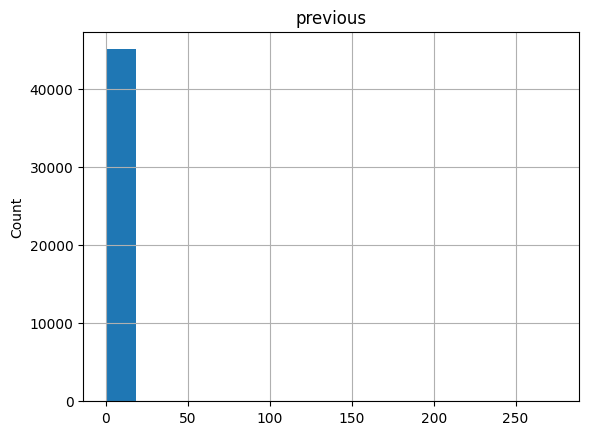

In [ ]:
for feature in continuous_feature:
    bank_data1 = bank.copy()
    bank_data1[feature].hist(bins=15)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

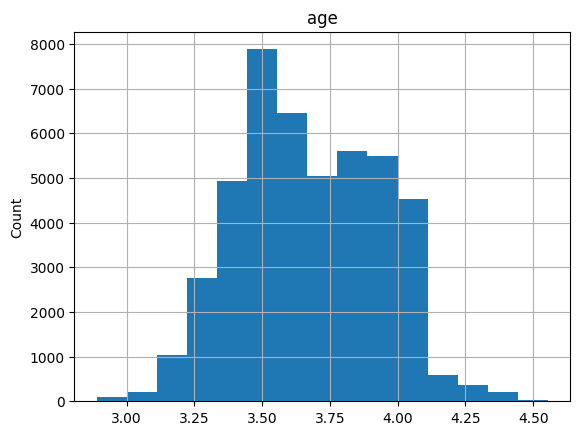

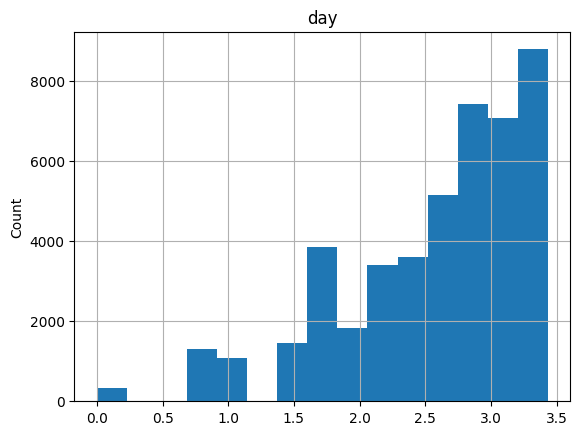

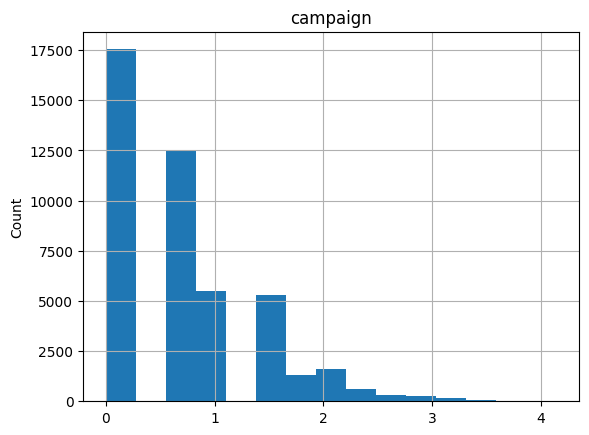

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


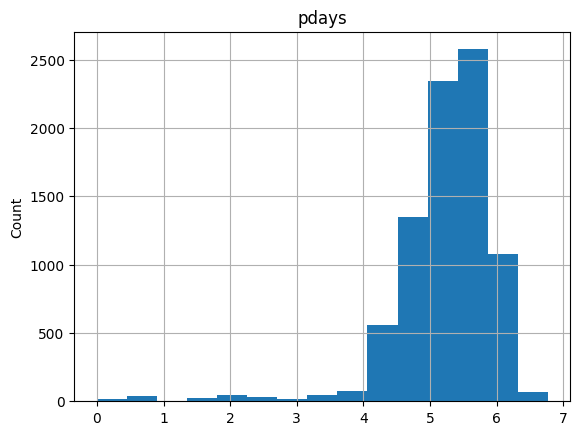

In [ ]:
#log transformation
for feature in continuous_feature:
    bank_data2 = bank.copy()
    if 0 in bank_data2[feature].unique():
        pass
    else:
        bank_data2[feature] = np.log(bank_data2[feature])
        bank_data2[feature].hist(bins=15)
        plt.ylabel('Count')
        plt.title(feature)
        plt.show()

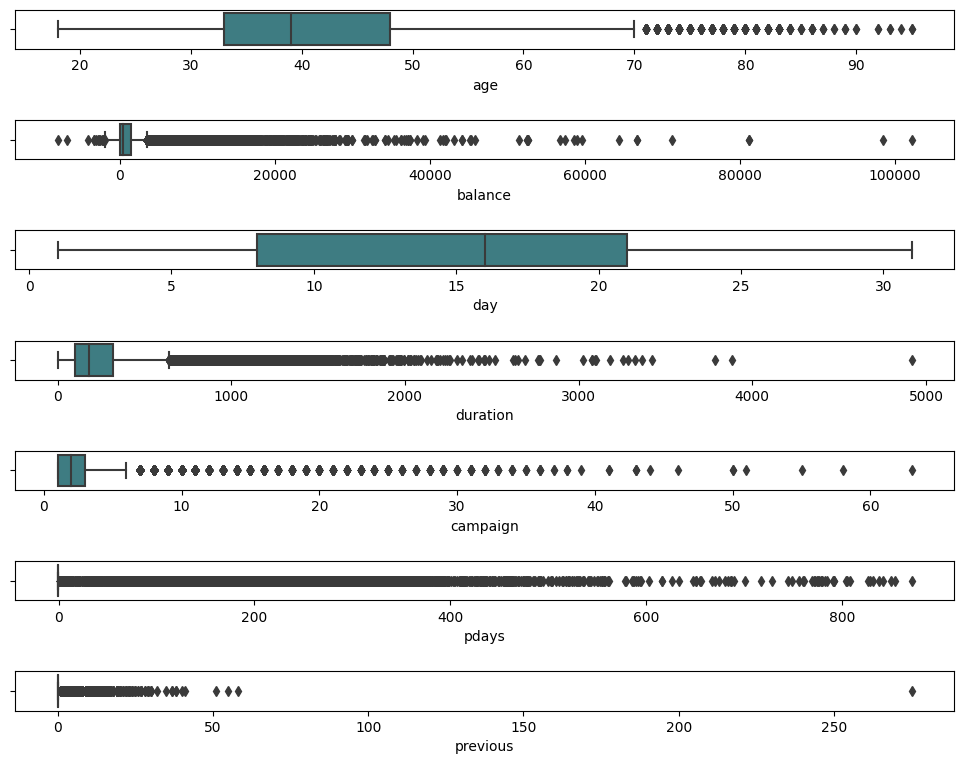

In [ ]:
#Outliers Detection
outlier = bank.copy() 
fig, axes = plt.subplots(7,1,figsize=(10,8), sharex=False, sharey=False)
sns.boxplot(x='age',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='balance',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='day',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='duration',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='campaign',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='pdays',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='previous',data=outlier,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

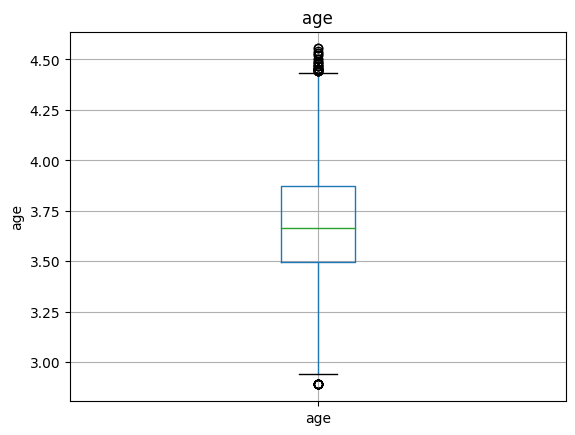

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


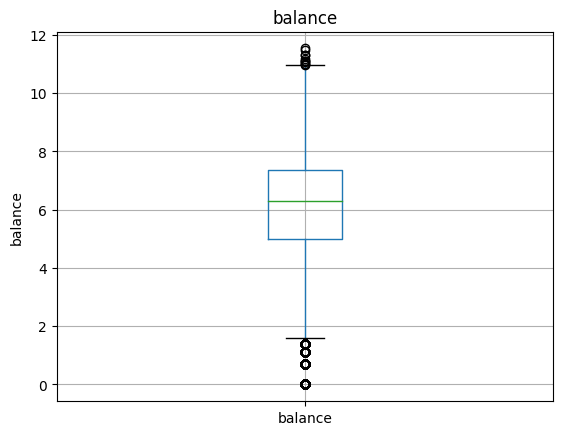

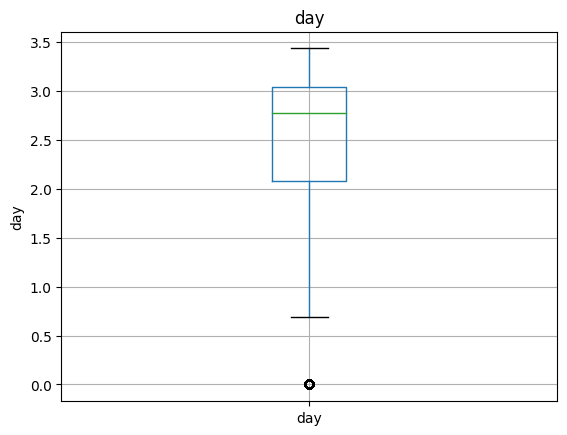

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


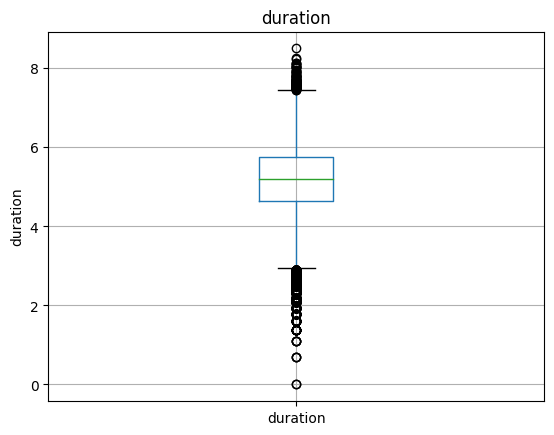

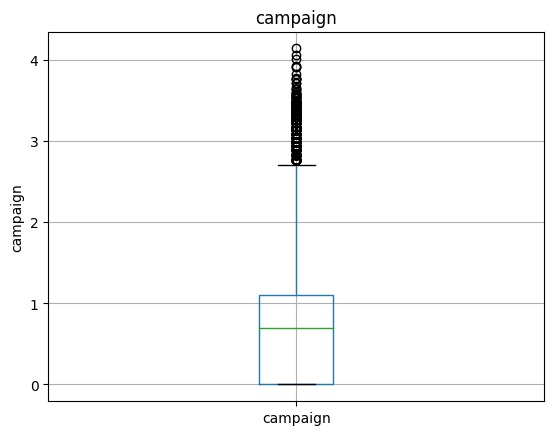

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


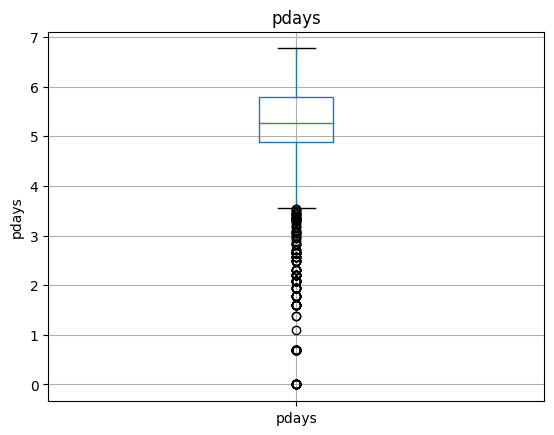

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1257: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1264: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1272: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1273: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


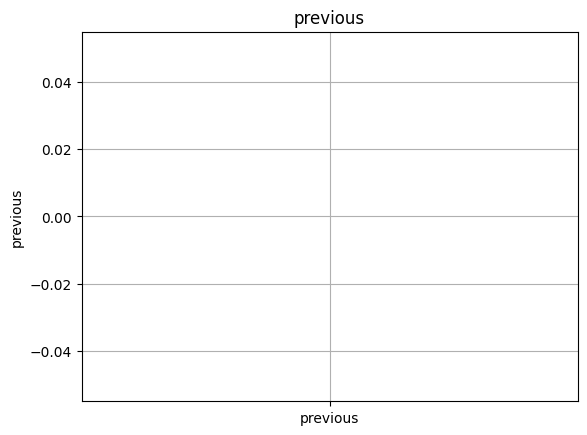

In [ ]:
#afterlog transformation
for feature in continuous_feature:
    bank_data3 = bank.copy()
    bank_data3[feature] = np.log(bank_data3[feature])
    bank_data3.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

Data Preprocessing

In [63]:
bank[['job','marital','education','default','housing','loan','contact','poutcome','month','y']] = bank[
    ['job','marital','education','default','housing','loan','contact','poutcome','month','y']].astype('category')
banknew = bank

In [64]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


Label Encoding

In [65]:
banknew['month'] = banknew['month'].cat.codes
banknew['job'] = banknew['job'].cat.codes
banknew['marital'] = banknew['marital'].cat.codes
banknew['education'] = banknew['education'].cat.codes
banknew['default'] = banknew['default'].cat.codes
banknew['housing'] = banknew['housing'].cat.codes
banknew['loan'] = banknew['loan'].cat.codes
banknew['contact'] = banknew['contact'].cat.codes
banknew['poutcome'] = banknew['poutcome'].cat.codes
banknew['y'] = banknew['y'].cat.codes

model building

In [66]:
x1 = banknew.drop('y', axis=1)
y1 = banknew[['y']]

In [67]:
x1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [68]:
y1

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [69]:
x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size=0.20,random_state=12)
print("Shape of X_train : ",x_train.shape)
print("Shape of X_test  : ",x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of X_train :  (36168, 16)
Shape of X_test  :  (9043, 16)
Shape of y_train :  (36168, 1)
Shape of y_test  :  (9043, 1)


In [71]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
#Predict for X dataset
y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)

In [74]:
#confusion matrix
confusion_matrix(y_train,y_pred_train)

array([[31349,   580],
       [ 3506,   733]])

In [75]:
confusion_matrix(y_test,y_pred_test)

array([[7850,  143],
       [ 853,  197]])

In [76]:
#accuracy score
accuracy_score(y_train,y_pred_train)

0.8870272063702721

AUC score : 81.62%


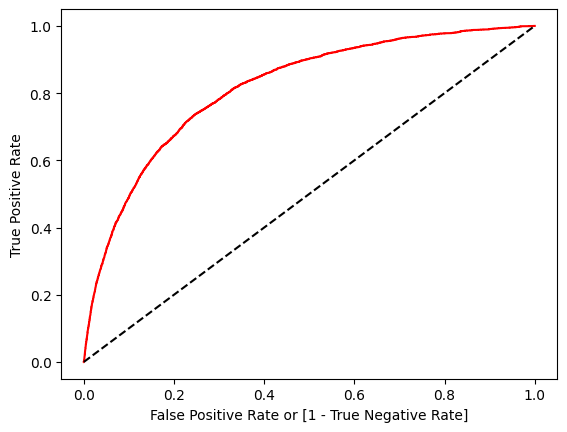

In [78]:
fpr, tpr, thresholds = roc_curve(y_train,classifier.predict_proba (x_train)[:,1])

auc = roc_auc_score(y_train,classifier.predict_proba (x_train)[:,1])
print('AUC score : {:.2f}%'.format(auc*100))

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [80]:
classification_report1 = classification_report(y_train,y_pred_train)
print(classification_report1)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31929
           1       0.56      0.17      0.26      4239

    accuracy                           0.89     36168
   macro avg       0.73      0.58      0.60     36168
weighted avg       0.86      0.89      0.86     36168



In [81]:
import pickle
pickle.dump(classifier, open("logistic_reg.pkl", 'wb'))
loaded_model = pickle.load(open("logistic_reg.pkl", 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.8898595598805706


In [82]:
loaded_model.coef_

array([[-2.38915708e-02,  1.59597446e-02, -1.11382518e-01,
        -1.68375804e-02, -5.34140437e-03,  3.56048792e-05,
        -2.19088837e-01, -6.56146892e-02, -2.25556759e-01,
        -1.97718262e-02, -6.34731132e-02,  3.49815048e-03,
        -3.20316792e-01, -9.64775977e-04,  1.31215675e-01,
        -2.13369664e-01]])

In [83]:
preds = loaded_model.predict(x_test)

In [84]:
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)